In [17]:
# importing essential library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import boto3

In [3]:
# Connecting to my AWS s3 server
s3 = boto3.resource(
    service_name ='s3',
    region_name = 'us-east-2',
    aws_access_key_id = "AKIARB76ZUKBPYGRD403",
    aws_secret_access_key = "pNLhWrLAOH9ba0eWfNnHolH4xSyrIvMI5z59xF28"
        )

In [4]:
# Printing my all Buckets present in s3 bucket
for bucket in s3.buckets.all():
    print(bucket.name)

rahulaws1


In [33]:
# Load csv from s3 bucket directly into python
obj = s3.Bucket('rahulaws1').Object('ipl.csv').get()
df = pd.read_csv(obj['Body'])
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [22]:
# Getting the list of Columns
df.columns.values

array(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'striker', 'non-striker', 'total'], dtype=object)

In [23]:
# Checking for NULL values
print(df.isnull().sum())
print(df.shape)

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64
(76014, 15)


# Step 1:
Data cleaning and formatting
In this step we will remove all the unwanted columns and clean any row for missing values.
Here I have shown how to remove the unwanted columns.

In [34]:
remove_columns = ['striker', 'non-striker', 'batsman', 'bowler']
df.drop(labels = remove_columns, axis=1, inplace=True)

# Step 2: 
Exploratory Data Analysis
Here, we will explore the data and decide what data we want to keep for feature engineering.

In [35]:
# Output of unique teams:
print(df['bat_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [36]:
# Output of unique venues:
print(df['venue'].unique())

['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurashtra Cricket Associa

In [37]:
# To see most used stadiums
# Output of number of times a stadium appears in the data by using the groupby() function:
df['count'] = 1
df.groupby(['venue']).count()['count']

venue
Barabati Stadium                                         856
Brabourne Stadium                                       1380
Buffalo Park                                             380
De Beers Diamond Oval                                    368
Dr DY Patil Sports Academy                              2088
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     1113
Dubai International Cricket Stadium                      868
Eden Gardens                                            7049
Feroz Shah Kotla                                        7068
Green Park                                               492
Himachal Pradesh Cricket Association Stadium            1115
Holkar Cricket Stadium                                   617
JSCA International Stadium Complex                       837
Kingsmead                                               1731
M Chinnaswamy Stadium                                   7443
MA Chidambaram Stadium, Chepauk                         5972
Maharashtra Cricke

Now that we know how many times a stadium is being used, we can choose only the top stadiums which have most data for our model prediction.

# Step 3: Feature Engineering and Selection

In this step we will decide which teams and venues to keep for making our model. We have used only the current playing teams and their respective home grounds.

In [38]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Sunrisers Hyderabad']

current_venues = ['M Chinnaswamy Stadium','Eden Gardens', 'Feroz Shah Kotla', 'MA Chidambaram Stadium, Chepauk',
       'Punjab Cricket Association Stadium, Mohali', 
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal']

df = df[(df['bat_team'].isin(current_teams)) &(df['bowl_team'].isin(current_teams))]
df = df[(df['venue'].isin(current_venues))]

# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

Now we will use Data Preprocessing to convert features using OneHotEncoding and also convert the string date into datetime object.


In [39]:
# # Converting 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
final_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team', 'venue'])
final_df.head()

,mid,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,count,bat_team_Chennai Super Kings,...,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium
32,1,2008-04-18,61,0,5.1,59,0,222,1,0,...,1,0,0,0,1,0,0,0,0,0
33,1,2008-04-18,61,1,5.2,59,1,222,1,0,...,1,0,0,0,1,0,0,0,0,0
34,1,2008-04-18,61,1,5.3,59,1,222,1,0,...,1,0,0,0,1,0,0,0,0,0
35,1,2008-04-18,61,1,5.4,59,1,222,1,0,...,1,0,0,0,1,0,0,0,0,0
36,1,2008-04-18,61,1,5.5,58,1,222,1,0,...,1,0,0,0,1,0,0,0,0,0


Here is a glimpse of how the data will look after using OneHotEncoding and rearranging the columns.

In [41]:
#rearranging the columns
final_df = final_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla','venue_M Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk','venue_Sawai Mansingh Stadium',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Wankhede Stadium', 'overs','runs', 'wickets', 'runs_last_5', 'wickets_last_5',
       'total']]

final_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,venue_Sawai Mansingh Stadium,"venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5.5,61,1,58,1,222


# Step 4 ,5: Compare Multiple Algorithms & Perform Hyperparameter Tuning

I have compared 3 algorithms here Linear Refression, Ridge Regression and Lasso Regression. First we will have to divide our data into train set and test set before using a machine learning algorithm.

Dividing into Train and Test Data

In [42]:
# Splitting the data into train and test set
X_train = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year<=2016]
X_test = final_df.drop(labels='total', axis=1)[final_df['date'].dt.year>=2017]

y_train = final_df[final_df['date'].dt.year<=2016]['total'].values
y_test = final_df[final_df['date'].dt.year>=2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

Now that we have dataset for training and testing, the first algorithm we will look at is Lasso Regression. We have used GridSearchCV for hyperparamter tuning.

## Linear Regression Model

In [43]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
liprediction = lin_regressor.predict(X_test)

## Ridge Regression Model

In [45]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [46]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.16714e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08862e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05529e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10313e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14561e-18): result may not be accurate

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [47]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-350.0187301130446


In [48]:
rprediction=ridge_regressor.predict(X_test)

## Lasso Regression Model

In [49]:
# --- Model Building ---
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction = lasso_regressor.predict(X_test)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3040230.8597574118, tolerance: 1783.1092408446677
  model = cd_fast.enet_coordinate_descent(
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3085804.755055531, tolerance: 1848.9269634785512
  model = cd_fast.enet_coordinate_descent(
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3372449.839683264, tolerance: 2045.141831793971
  model = cd_fast.enet_coordinate_descent(
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

{'alpha': 1}
-343.1309689444174


In [51]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-343.1309689444174


In [52]:
laprediction = lasso_regressor.predict(X_test)

# Step 6: Evaluate the models

### 1. Linear Regression

Evaluating the Linear Regression model using Distplot and Sklearn Metrics:

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

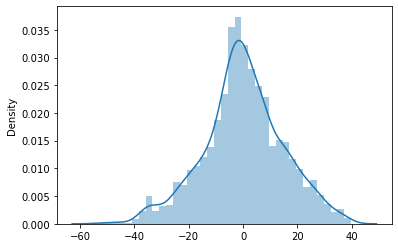

In [53]:
import seaborn as sns
sns.distplot(y_test-liprediction)

In [54]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, liprediction))
print('MSE:', metrics.mean_squared_error(y_test, liprediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, liprediction)))

MAE: 11.2881213999508
MSE: 217.05389589770806
RMSE: 14.732749095050389


### 2. Ridge Regression

Evaluating the Linear Regression model using Distplot and Sklearn Metrics:

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

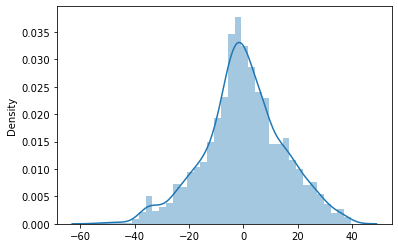

In [55]:
import seaborn as sns
sns.distplot(y_test-rprediction)

In [56]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, rprediction))
print('MSE:', metrics.mean_squared_error(y_test, rprediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rprediction)))

MAE: 11.27473307791391
MSE: 216.4996890335021
RMSE: 14.713928402486609


### 3. Lasso Regression

Evaluating the Lasso Regression model using Distplot and Sklearn Metrics:

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


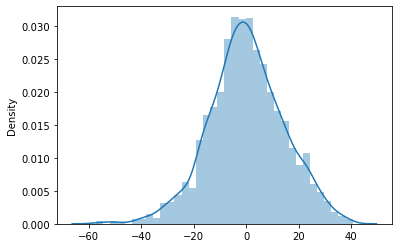

In [57]:
print(sns.distplot(y_test-laprediction))

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, laprediction))
print('MSE:', metrics.mean_squared_error(y_test, laprediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, laprediction)))

MAE: 11.119955248920911
MSE: 203.8244914758093
RMSE: 14.276711507760087


In this plot we can observe that most of our values are 0 or close to 0. Therefore we can state that the Lasso regression model works fine.

# Saving model for deployment
By analyzing the above models we can conclude that Lasso Regression works better on our dataset as it had lower error metric values than Linear Regression and Ridge Regression. Now we will save the model in a pickle file.

In [41]:
# Creating a pickle file for the classifier
import pickle
filename = 'first-innings-score-la-model.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))